

```
# This is formatted as code
```

## Credit Card Approval Predictor

Banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too mnay inquiries on an individual's credit report. Manually analyzing these applications is error-prone and a time-consuming process. This task can be automated with the power of machine learning. In this project, we will build an automatic credit card approval predictor usig machine learning techniques.

  ![image.png](attachment:52322583-17f4-4395-a66f-44ec18f5281f.png)

1. ID: Unique Id of the row
2. CODE_GENDER: Gender of the applicant. M is male and F is female.
3. FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.
4. FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.
5. CNT_CHILDREN: Count of children.
6. AMT_INCOME_TOTAL: the amount of the income.
7. NAME_INCOME_TYPE: The type of income (5 types in total).
8. NAME_EDUCATION_TYPE: The type of education (5 types in total).
9. NAME_FAMILY_STATUS: The type of family status (6 types in total).
10. DAYS_BIRTH: The number of the days from birth (Negative values).
11. DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
12. FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.
13. FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
14. FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.
15. FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.
16. OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.
17. CNT_FAM_MEMBERS: The count of family members.

In [ ]:
!pip install missingno

In [ ]:
#Import Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno
#for visualization missing data

In [ ]:
# Reading the File
data = pd.read_csv("application_record.csv")
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
data.describe(include="all")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [ ]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


The number of application records & the unique ID's are not same which depicts the values must be duplicated.

In [ ]:
records = pd.read_csv("credit_record.csv")
records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
records.describe(include="all")

,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN


In [ ]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


**Before removing duplicated data**

In [ ]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 36,457 customers.

**After removing duplicated data**

In [ ]:
print(f'Duplicates in applications data: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')

print(f'Duplicates in records data: {records.duplicated().sum()},  ({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in applications data: 348472, (79.5%)
Duplicates in records data: 0,  (0.0%)


In [ ]:
data.duplicated().sum()

0

**Drop duplicates**

In [ ]:
# Drop Duplicates
data=data.drop_duplicates(subset=data.columns[1:], keep="first")

In [ ]:
data.shape

(90085, 18)

In [ ]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 9709 customers.

**Finding the Cardinality in the data**

Cardinality refers to the distinctiveness or uniqueness of values in a dataset or database column. It represent the number of unique values in a column or a set of columns.

In [ ]:
[(col, data[col].nunique()) for col in data.columns]

[('ID', 90085),
 ('CODE_GENDER', 2),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('CNT_CHILDREN', 12),
 ('AMT_INCOME_TOTAL', 866),
 ('NAME_INCOME_TYPE', 5),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 5),
 ('NAME_HOUSING_TYPE', 6),
 ('DAYS_BIRTH', 16379),
 ('DAYS_EMPLOYED', 9406),
 ('FLAG_MOBIL', 1),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('OCCUPATION_TYPE', 18),
 ('CNT_FAM_MEMBERS', 13)]

In [ ]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [ ]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                                         columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [ ]:
data["FLAG_MOBIL"].unique()

array([1])

In [ ]:
data.drop(['FLAG_MOBIL'],axis=1,inplace=True)

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [ ]:
data.shape

(90085, 17)

## Handling Missing Values

Missing Values can pose challenges when working with data, as they can affect data integrity, accuracy, and validity of analysis or modelling results. It is important to handle missing values appropriately in order to avoid biased or incomplete analysis.

In [ ]:
data.isnull().sum()/len(data)*100

,0
ID,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000


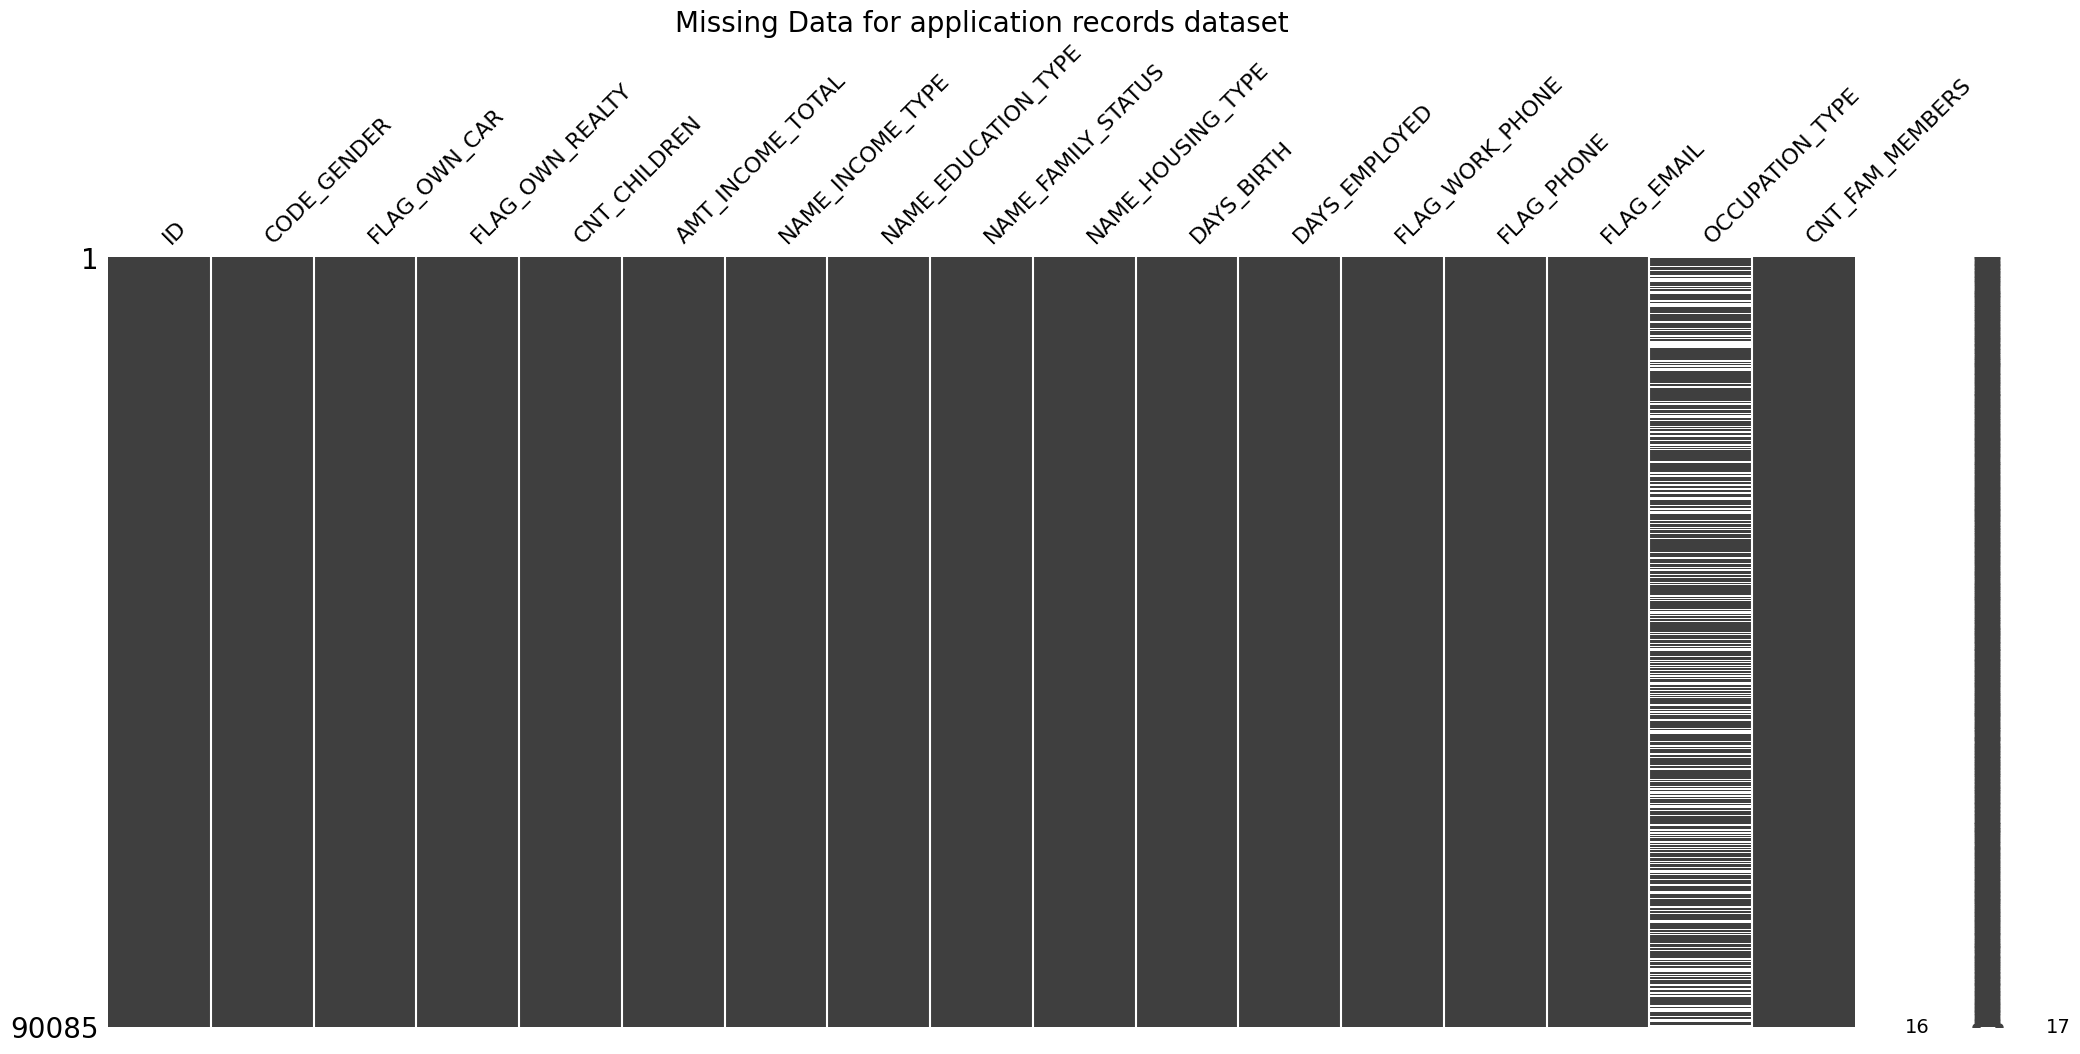

In [ ]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset",fontsize=20);

As we can observe from above that "OCCUPATION_TYPE" is the only column from applications data having large set of missing values. Appropriate handling of missing values can help ensure the integrity and accuracy of data analyses and modelling results.

In [ ]:
records.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


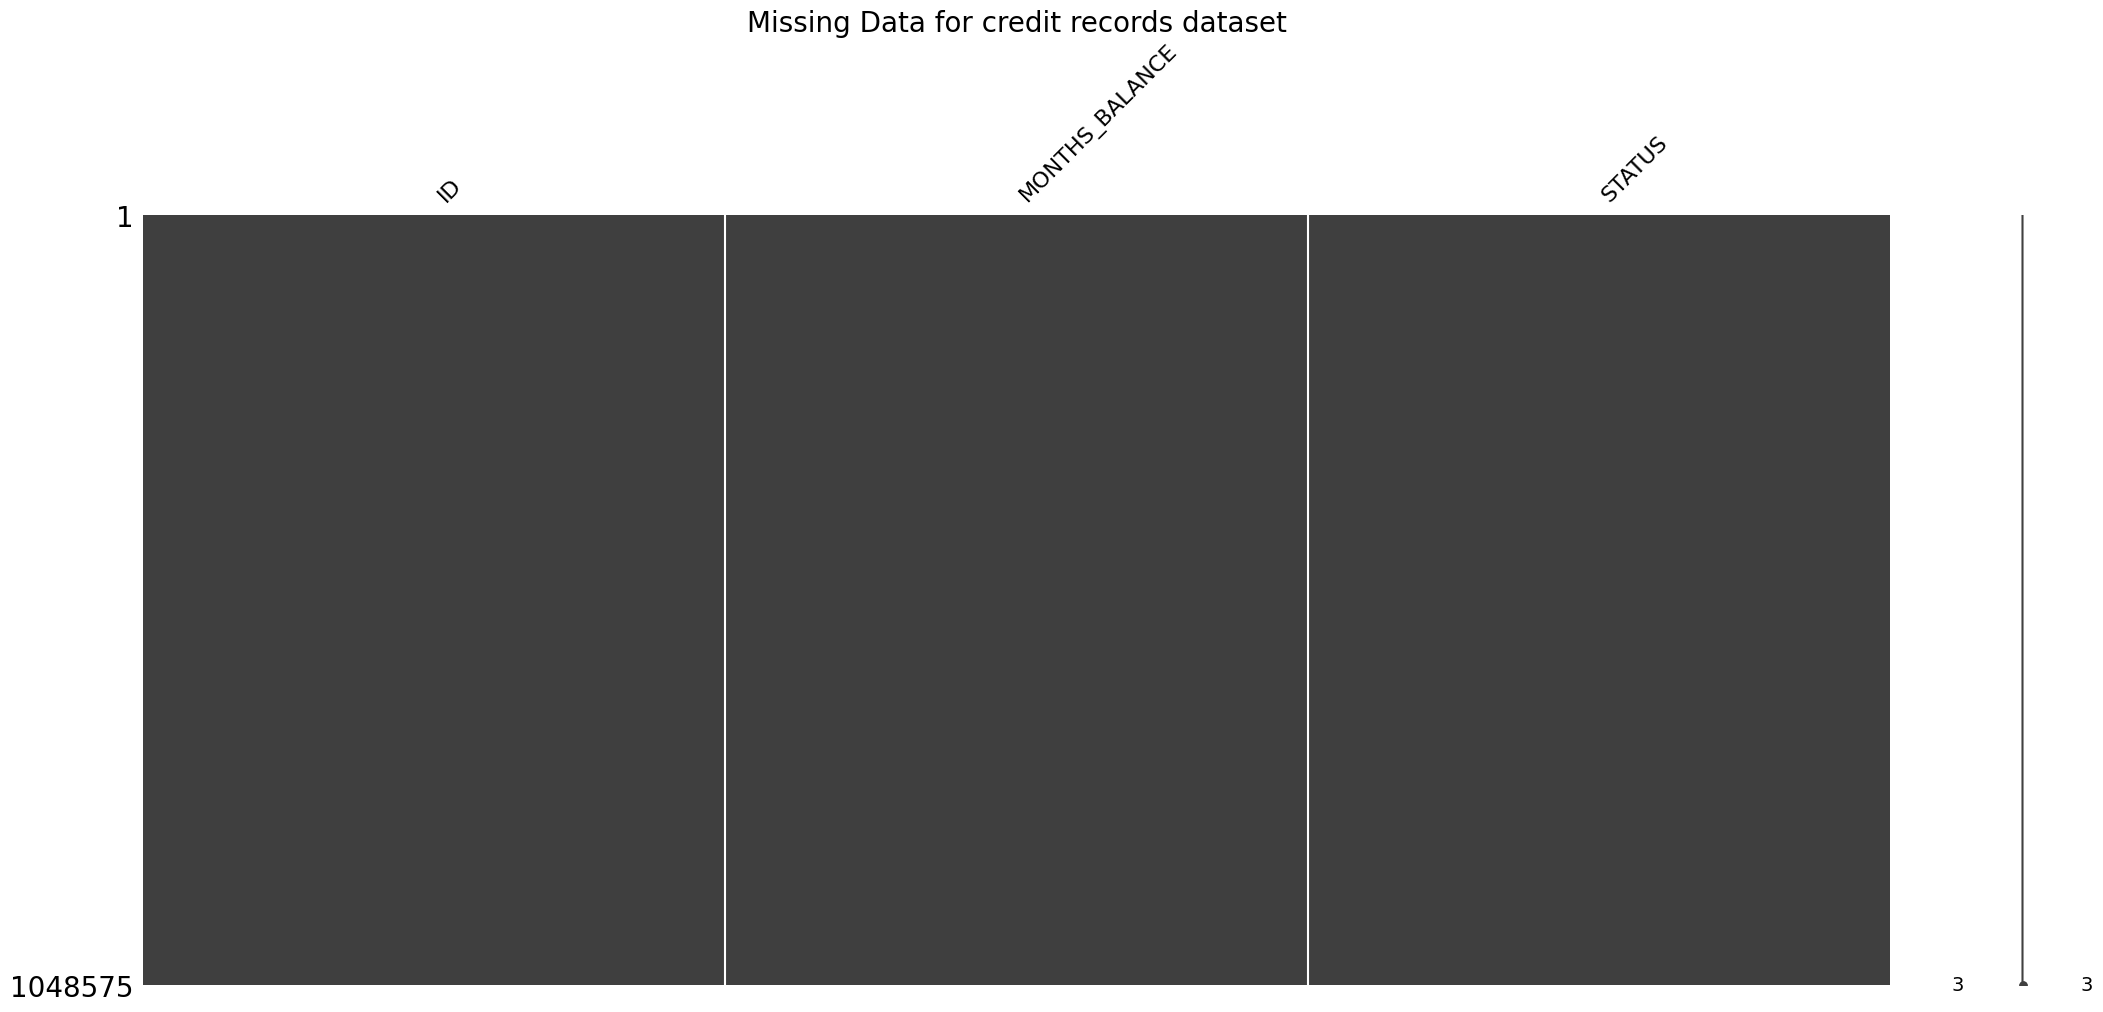

In [ ]:
missing2 = msno.matrix(records)
missing2.set_title("Missing Data for credit records dataset",fontsize=20);

In [ ]:
data['OCCUPATION_TYPE'].value_counts()/len(data)*100

,count
OCCUPATION_TYPE,
Laborers,18.453683
Sales staff,10.127102
Core staff,8.981517
Managers,7.409669
Drivers,6.504968
High skill tech staff,3.726481
Accountants,3.367930
Medicine staff,2.757396
Cooking staff,1.958151


In [ ]:
# Fill missing values
data["OCCUPATION_TYPE"].fillna(value="Other", inplace=True)

As droping the missing values completely can lead to huge data loss. So instead of dropping we will try to fill the missing values as "Other", So the data loss
can also be prevented & missing values will also get handled appropriately.

In [ ]:
data.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
records.STATUS.value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223




```
# This is formatted as code
```

**Converting data in proper format**

In [ ]:
# target=1 (high risk) if there is at least
#one month where user is late on payments by 30 days or more

records['target']=records['STATUS']
records['target'].replace('X', 0, inplace=True)
records['target'].replace('C', 0, inplace=True)
records['target']=records['target'].astype(int)
records.loc[records['target']>=1, 'target']=1
records.head(50)

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


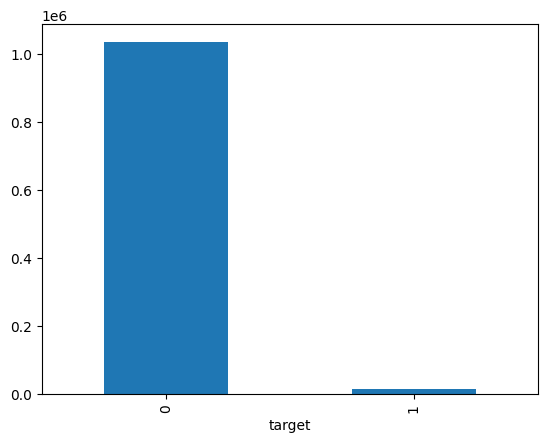

In [ ]:
records.target.value_counts().plot(kind="bar");

In [ ]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [ ]:
records.head(20)

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [ ]:
df=pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [ ]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [ ]:
new_df=pd.merge(data, df, how="inner", on=['ID'])

In [ ]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [ ]:
new_df.shape

(9709, 18)

In [ ]:
# Extracting how many months account has been open for
start_df=pd.DataFrame(records.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename Column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [ ]:
start_df.head()

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [ ]:
# Merge dataframes on ID
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [ ]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1,20
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1,19
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1,21
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1,32


In [ ]:
data['DAYS_BIRTH']

,DAYS_BIRTH
0,-12005
2,-21474
3,-19110
7,-22464
10,-16872
...,...
438541,-13510
438545,-18832
438547,-10966
438552,-22717


As you can see that "DAYS BIRTH" column is giving the information about the age of individual, but here its not in proper format. So we will try to convert it into a proper form to make it more understandable

In [ ]:
# Create age feature
new_df['AGE_YEARS']=round(-new_df['DAYS_BIRTH']/365.2425,0)
#The number 365.2425 is used because it represents the average length of a tropical year,
#which is the time it takes for the Earth to complete one orbit around the sun.

In [ ]:
new_df['AGE_YEARS'].head()

,AGE_YEARS
0,33.0
1,59.0
2,52.0
3,62.0
4,46.0


As now we have converted the "DAYS_BIRTH" column into a proper format & named it as "AGE_YEARS". So now both are somewhat sharing same set of information in the data. So we wll drop out the "DAYS_BIRTH" for betterment of the data.

In [ ]:
new_df.drop(["DAYS_BIRTH"],axis=1,inplace=True)

In [ ]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0


In [ ]:
new_df.loc[-new_df['DAYS_EMPLOYED']<0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
16,5008884,F,N,Y,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,365243,0,0,0,Other,1.0,0,40,55.0
24,5008974,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,0,0,0,Other,2.0,0,49,61.0
34,5009033,F,N,N,0,255150.0,Pensioner,Incomplete higher,Civil marriage,Rented apartment,365243,0,0,0,Other,2.0,0,16,51.0
40,5009060,F,N,Y,0,94500.0,Pensioner,Higher education,Married,House / apartment,365243,0,1,0,Other,2.0,0,3,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,5116549,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,0,0,0,Other,2.0,1,27,58.0
9682,5116550,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,0,0,0,Other,2.0,1,23,58.0
9686,5118280,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,365243,0,0,0,Other,2.0,1,48,58.0
9687,5118283,M,N,N,0,112500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,365243,0,0,0,Other,2.0,1,39,58.0


In [ ]:
# Create unemployed indicator
new_df['UNEMPLOYED']=0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

In [ ]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0


In [ ]:
new_df["DAYS_EMPLOYED"]

,DAYS_EMPLOYED
0,-4542
1,-1134
2,-3051
3,365243
4,-769
...,...
9704,-198
9705,-2694
9706,-1721
9707,-1325


As we can observe the no. of the days the applicant is working i.e. "DAYS_EMPLOYED" is not proper format, So we will try to convert it in a proper format.

In [ ]:
# Create years employed feature
new_df['YEARS_EMPLOYED']=round(-new_df['DAYS_EMPLOYED']/365.2425)
new_df.loc[new_df['YEARS_EMPLOYED']<0, 'YEARS_EMPLOYED']=0
new_df.head(30)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,46.0,0,2.0
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,2.0,0,17,49.0,0,3.0
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,0,0,0,Accountants,2.0,1,25,29.0,0,3.0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,Laborers,2.0,1,31,27.0,0,4.0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,Other,2.0,0,44,30.0,0,4.0
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,5.0,0,24,35.0,0,3.0


As now we have converted "DAYS_EMPLOYED" column into a proper format & named it as "YEARS_EMPLOYED". So now both are somewhat sharing same set of information in the data. So we will drop out the "DAYS_EMPLOYED" for betterment of the data.

In [ ]:
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [ ]:
new_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,2.0,0,17,49.0,0,3.0
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,0,0,0,Accountants,2.0,1,25,29.0,0,3.0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,1,0,Laborers,2.0,1,31,27.0,0,4.0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,0,Other,2.0,0,44,30.0,0,4.0
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,5.0,0,24,35.0,0,3.0


**Renaming the column names**

In [ ]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [ ]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [ ]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [ ]:
new_df.dtypes

,0
ID,int64
Gender,object
Own_car,object
Own_property,object
Num_children,int64
Total_income,float64
Income_type,object
Education_type,object
Family_status,object
Housing_type,object


In [ ]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})

palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

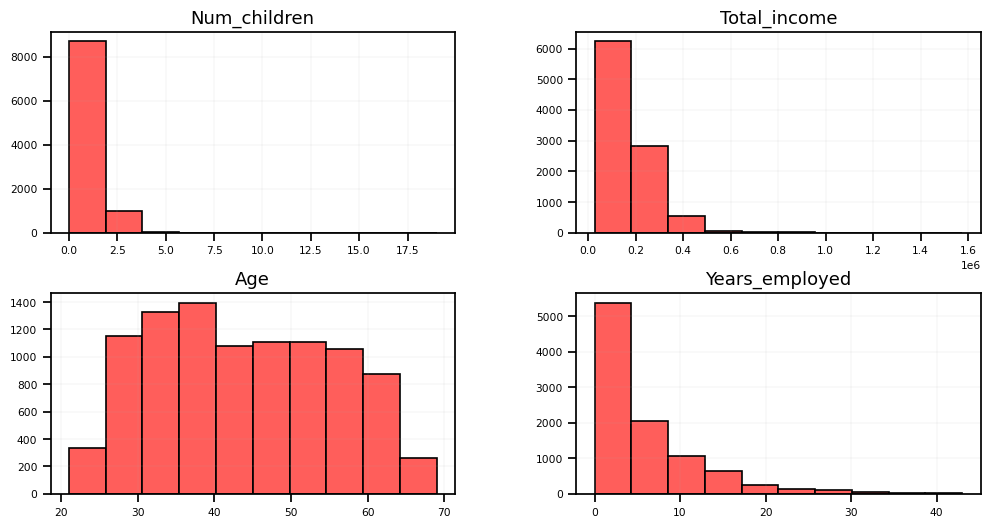

In [ ]:
plt.figure(figsize=(10,10))

cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

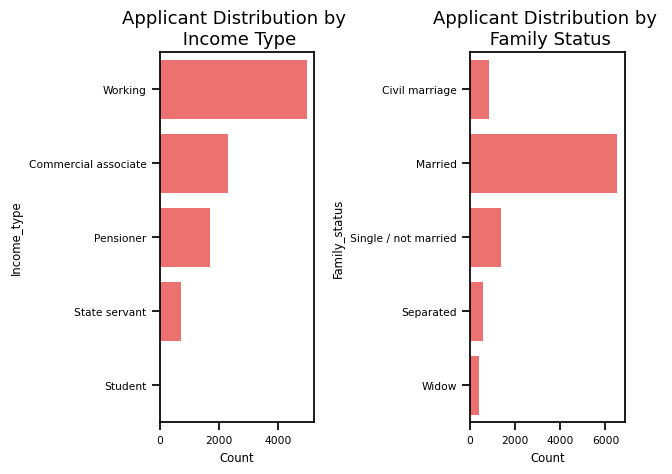

In [ ]:
# Purely for object Datatype
ig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

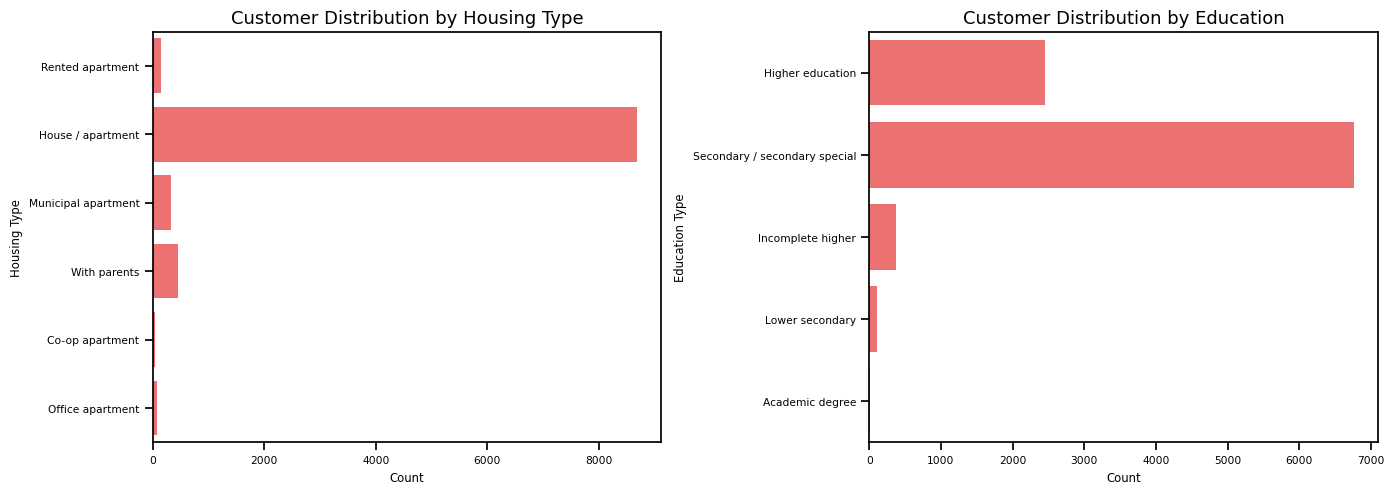

In [ ]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")


g2=sns.countplot(y=new_df.Education_type,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")


fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

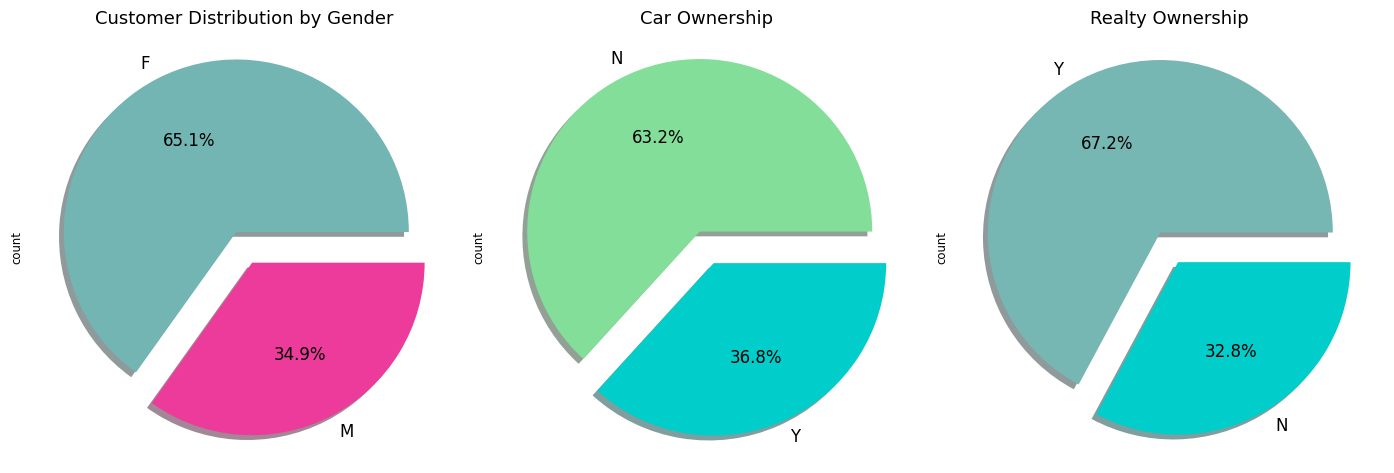

In [ ]:
fig, axes = plt.subplots(1,3)

g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [ ]:
# Description of above graph

In [ ]:
object_columns = new_df.columns[new_df.dtypes =='object'].tolist()
#object columns in dataset

unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts
#unique counts for object columns

,Column_Name,Num_Unique
0,Gender,2
1,Own_car,2
2,Own_property,2
3,Income_type,5
4,Education_type,5
5,Family_status,5
6,Housing_type,6
7,Occupation_type,19


In [ ]:
# Checking unique values from categorical Columns

for i in new_df.columns[(new_df.dtypes == "object").values].tolist():
    print(i, '\n')
    print(new_df[i].value_counts())
    print('-----------------------------------------------------')

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
-----------------------------------------------------
Own_car 

Own_car
N    6139
Y    3570
Name: count, dtype: int64
-----------------------------------------------------
Own_property 

Own_property
Y    6520
N    3189
Name: count, dtype: int64
-----------------------------------------------------
Income_type 

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
-----------------------------------------------------
Education_type 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
-----------------------------------------------------
Family_status 

Family_status
Married                 6530
Single / not married    13

In [ ]:
# Encode binary features
new_df["Gender"] = new_df["Gender"].replace(['F','M'],[0,1])
new_df["Own_car"] = new_df["Own_car"].replace(['Y','N'],[1,0])
new_df["Own_property"] = new_df["Own_property"].replace(['Y','N'],[1,0])

In [ ]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [ ]:
new_df.Income_type.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
new_df['Is_Working'] = new_df["Income_type"].replace(["Working",'Commercial associate', 'State servant','Pensioner', 'Student'],
                                                     [1,1,1,0,0])

new_df['Marital_Status'] = new_df['Family_status'].replace(["Civil marriage", "Married", "Single / not married",
                                                            "Separated", "Widow"], [1,1,0,0,0])

In [ ]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_Status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Other,2.0,1,15,33.0,0,12.0,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,0,29,59.0,0,3.0,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,1,Accountants,2.0,0,5,46.0,0,2.0,1,1


In [ ]:
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

In [ ]:
new_df["Housing_type"] = new_df["Housing_type"].map(housing_type)

In [ ]:
new_df["Housing_type"].value_counts()

,count
Housing_type,
House / apartment,9261
With parents,448


In [ ]:
family_status = {'Single / not married':'Single',
                'Separated':'Single',
                'Widow':'Single',
                'Civil marriage':'Married',
                'Married':'Married'}

new_df["Family_status"] = new_df["Family_status"].map(family_status)

In [ ]:
new_df["Family_status"].value_counts()

,count
Family_status,
Married,7366
Single,2343


In [ ]:
education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

new_df["Education_type"] = new_df["Education_type"].map(education_type)

In [ ]:
new_df["Education_type"].value_counts()

,count
Education_type,
secondary,6875
Higher education,2828
Academic degree,6


In [ ]:
income_type = {'Commercial associate': 'Working',
               'State servant': 'Working',
               "Working": 'Working',
               'Pensioner': 'Pensioner',
               'Student': 'Student'}

new_df["Income_type"] = new_df["Income_type"].map(income_type)

In [ ]:
new_df.Income_type.value_counts()

,count
Income_type,
Working,7994
Pensioner,1712
Student,3


In [ ]:
new_df["Household_Size"] = new_df["Num_children"] + new_df["Marital_Status"].apply(lambda x: 2 if x==1 else 1)

In [ ]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_Status,Household_Size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,0,5,46.0,0,2.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,secondary,Married,House / apartment,...,Laborers,2.0,1,20,56.0,0,1.0,0,1,2
9705,5149055,0,0,1,0,112500.0,Working,secondary,Married,House / apartment,...,Other,2.0,1,19,43.0,0,7.0,1,1,2
9706,5149729,1,1,1,0,90000.0,Working,secondary,Married,House / apartment,...,Other,2.0,1,21,52.0,0,5.0,1,1,2
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,Medicine staff,2.0,1,32,34.0,0,4.0,0,1,2


In [ ]:
numerical_cols = ["Total_income","Age","Years_employed","Household_Size"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))

fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()

In [ ]:
new_df['Years_employed'].value_counts()

,count
Years_employed,
0.0,1978
1.0,991
2.0,851
3.0,824
4.0,735
5.0,645
6.0,510
7.0,463
8.0,418


In [ ]:
new_df['Household_Size'].value_counts()

,count
Household_Size,
2,5173
1,1957
3,1636
4,801
5,117
6,18
7,4
15,1
20,1


In [ ]:
new_df[(new_df["Years_employed"]==43)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_Status,Household_Size
7142,5112905,0,0,1,0,180000.0,Working,secondary,Married,House / apartment,...,Medicine staff,2.0,0,16,63.0,0,43.0,1,1,2
9328,5148702,0,0,1,0,126000.0,Working,secondary,Married,House / apartment,...,Core staff,2.0,0,57,62.0,0,43.0,1,1,2


In [ ]:
new_df[(new_df["Household_Size"]==20)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_Status,Household_Size
6840,5105054,0,0,1,19,112500.0,Working,secondary,Single,House / apartment,...,Waiters/barmen staff,20.0,0,5,30.0,0,5.0,1,0,20


<Axes: ylabel='Num_children'>

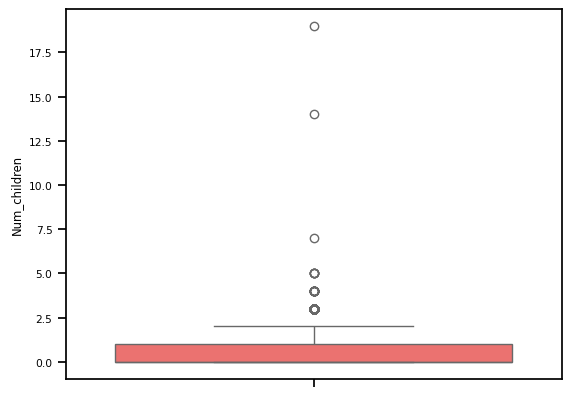

In [ ]:
sns.boxplot(new_df['Num_children'])

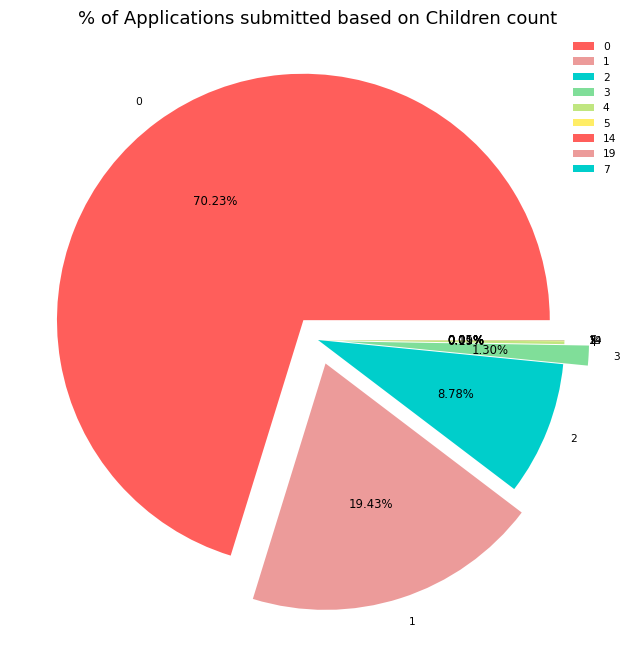

In [ ]:
# This graph shows that, majority of applicant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(new_df['Num_children'].value_counts(), labels=new_df['Num_children'].value_counts().index,explode = [0.1,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0],autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

In [ ]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_Status', 'Household_Size'],
      dtype='object')

In [ ]:
# Rearrange the target column
new_df = new_df.loc[:, ['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_Status', 'Household_Size', 'Target']]

In [ ]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,...,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_Status,Household_Size,Target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,...,Other,2.0,15,33.0,0,12.0,1,1,2,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,...,Security staff,2.0,29,59.0,0,3.0,1,1,2,0
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,...,Sales staff,1.0,4,52.0,0,8.0,1,0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,...,Other,1.0,20,62.0,1,0.0,0,0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,...,Accountants,2.0,5,46.0,0,2.0,1,1,2,0


In [ ]:
new_df.drop(['ID'],axis=1,inplace=True)

In [ ]:
new_df.drop(['Email'],axis=1,inplace=True)

In [ ]:
new_df.drop(['Phone'],axis=1,inplace=True)

In [ ]:
new_df.drop(['Work_phone'],axis=1,inplace=True)

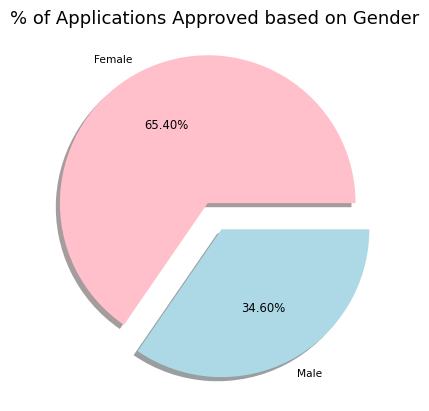

In [ ]:
plt.pie(new_df[new_df['Target']==0]['Gender'].value_counts(),explode=[0.1,0.1],shadow =True, labels=['Female', 'Male'], autopct='%1.2f%%',colors=["pink",'lightblue'])
plt.title('% of Applications Approved based on Gender')
plt.show()

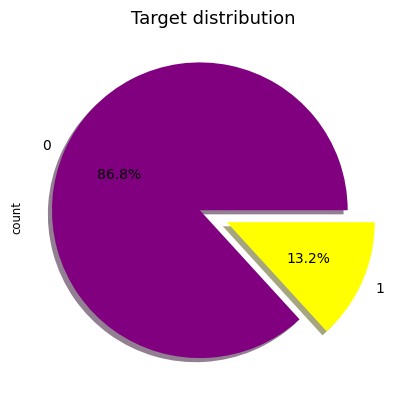

In [ ]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['purple', 'yellow'],textprops = {'fontsize':10}).set_title("Target distribution")

plt.show()

In [ ]:
colname=[]
for x in new_df.columns:
    if new_df[x].dtype=='object':
        colname.append(x)
colname

['Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type']

In [ ]:
#To check if there are any special characters in place of values
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0])}
{'Own_car': array([1, 0])}
{'Own_property': array([1, 0])}
{'Num_children': array([ 0,  1,  3,  2,  4,  5, 14, 19,  7])}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   65250. ,  184500. ,
        103500. ,  162000. ,  165

**Converting all Non-Numerical Columns to Numerical**

In [ ]:
#Converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Pensioner': 0, 'Student': 1, 'Working': 2}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'secondary': 2}
Feature Family_status
mapping {'Married': 0, 'Single': 1}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}
Feature Occupation_type
mapping {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Other': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}


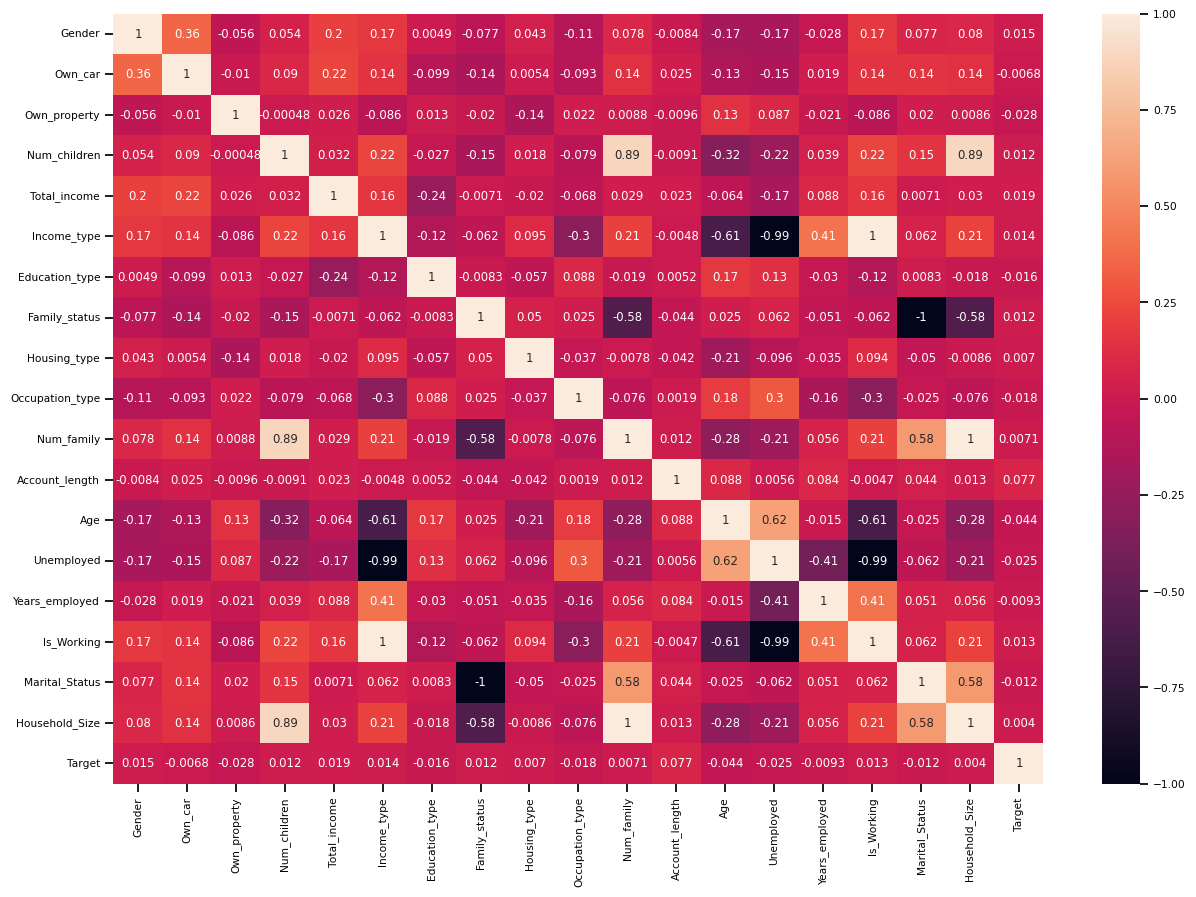

In [ ]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

#unemployed is highly negatively  corelated to income type
#martial status is highly negative corelated to family status
#household size is highly postive corelated to num family
#household size is highly postive corelated to num children

In [ ]:
new_df.drop('Num_family', axis=1, inplace=True)

In [ ]:
new_df.drop('Num_children', axis=1, inplace=True)

In [ ]:
new_df.drop('Is_Working', axis=1, inplace=True)

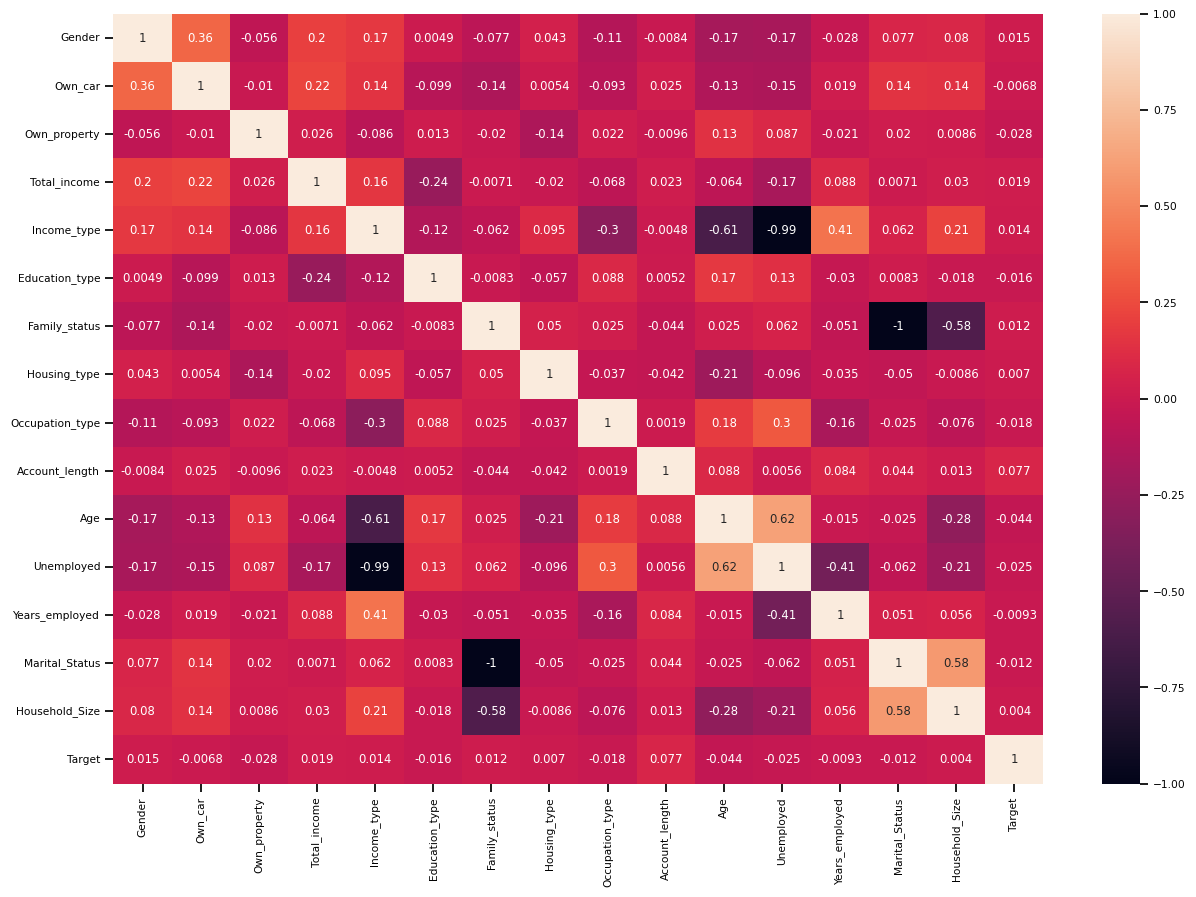

In [ ]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
new_df.drop(["Family_status"],axis=1,inplace=True)

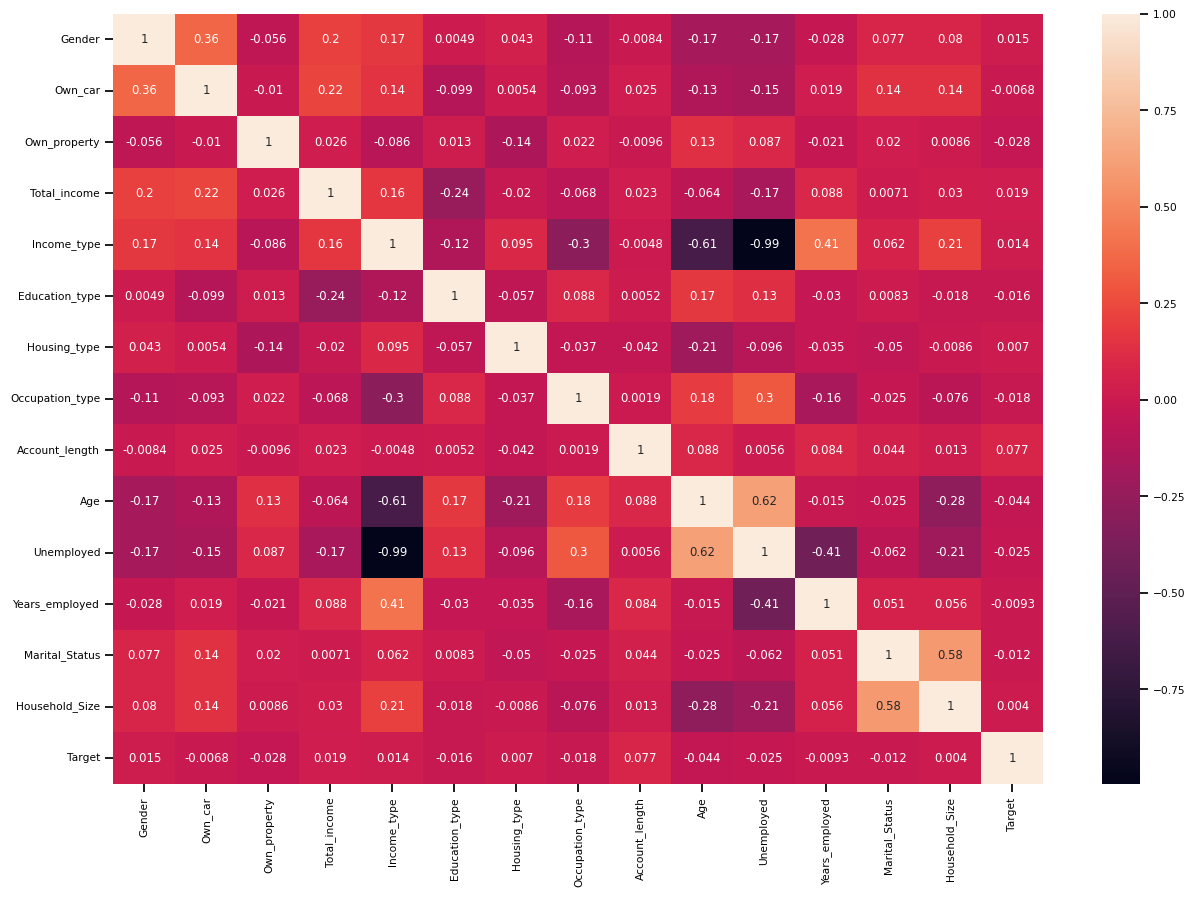

In [ ]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
new_df.shape

(9709, 15)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Total_income     9709 non-null   float64
 4   Income_type      9709 non-null   int64  
 5   Education_type   9709 non-null   int64  
 6   Housing_type     9709 non-null   int64  
 7   Occupation_type  9709 non-null   int64  
 8   Account_length   9709 non-null   int64  
 9   Age              9709 non-null   float64
 10  Unemployed       9709 non-null   int64  
 11  Years_employed   9709 non-null   float64
 12  Marital_Status   9709 non-null   int64  
 13  Household_Size   9709 non-null   int64  
 14  Target           9709 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 1.1 MB


## Creating X & Y variables for predictions

In [ ]:
#create X & Y
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [ ]:
print(X.shape)
print(Y.shape)

(9709, 14)
(9709,)


## Scaling the X variables

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7767, 14)
(1942, 14)
(7767,)
(1942,)


** **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


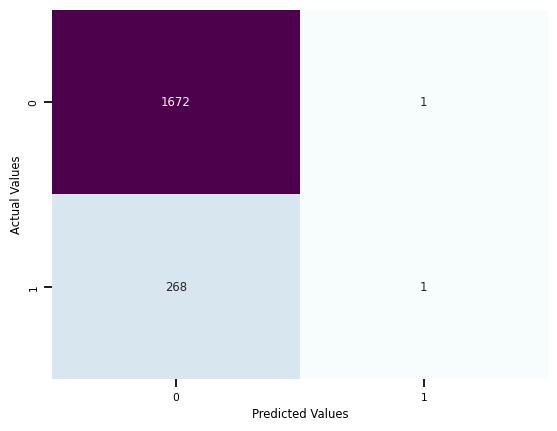

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.50      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.68      0.50      0.47      1942
weighted avg       0.81      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

**KNN**

In [ ]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

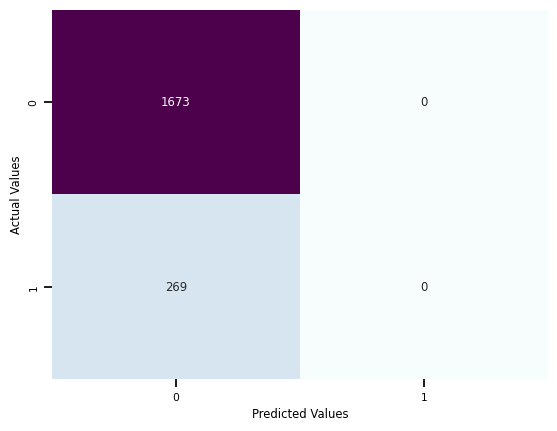

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train,Y_train)
#predicting the test set results
Y_pred = classifier.predict(X_test)

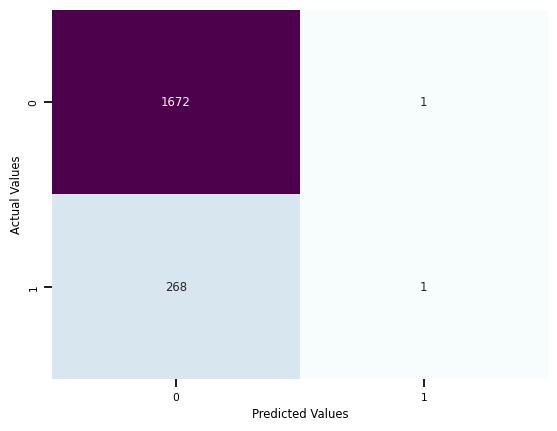

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.50      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.68      0.50      0.47      1942
weighted avg       0.81      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

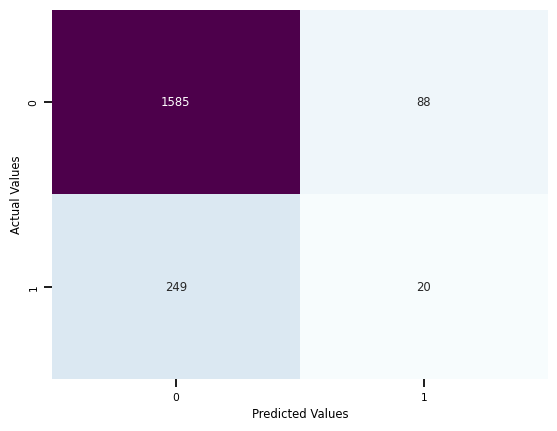

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1673
           1       0.19      0.07      0.11       269

    accuracy                           0.83      1942
   macro avg       0.52      0.51      0.51      1942
weighted avg       0.77      0.83      0.79      1942

Accuracy of the model:  0.8264675592173018


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
x=new_df.columns[:-1]
x

Index(['Gender', 'Own_car', 'Own_property', 'Total_income', 'Income_type',
       'Education_type', 'Housing_type', 'Occupation_type', 'Account_length',
       'Age', 'Unemployed', 'Years_employed', 'Marital_Status',
       'Household_Size'],
      dtype='object')

In [ ]:
list(zip(x,model_DecisionTree.feature_importances_))

[('Gender', 0.023295392169864263),
 ('Own_car', 0.021092753542211087),
 ('Own_property', 0.011523439120863684),
 ('Total_income', 0.17886334687176617),
 ('Income_type', 0.012059416127539795),
 ('Education_type', 0.020584016934439554),
 ('Housing_type', 0.00813200885216634),
 ('Occupation_type', 0.10013100332271259),
 ('Account_length', 0.21542999126098664),
 ('Age', 0.17157202901410923),
 ('Unemployed', 0.004512745688158629),
 ('Years_employed', 0.1498997070267309),
 ('Marital_Status', 0.018219451570954684),
 ('Household_Size', 0.06468469849749653)]

In [ ]:
y=new_df["Target"]
x=new_df.drop(["Target"],axis=1)

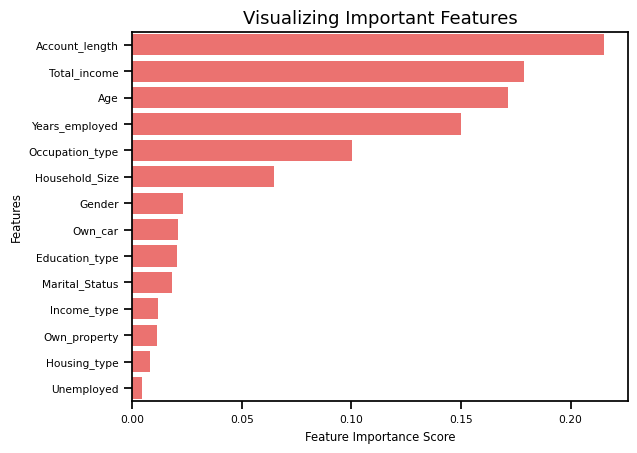

In [ ]:
feature_imp = pd.Series(model_DecisionTree.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=65,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

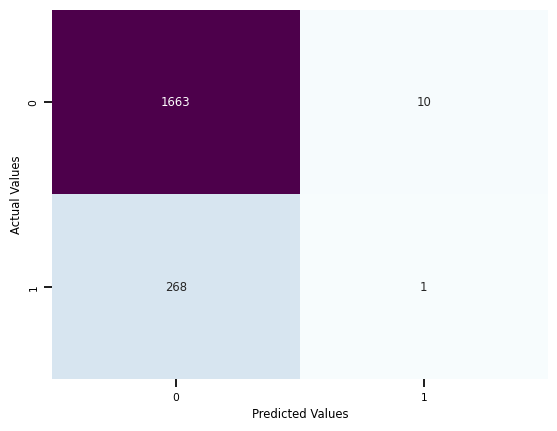

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.09      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.48      0.50      0.47      1942
weighted avg       0.75      0.86      0.80      1942

Accuracy of the model:  0.8568486096807415


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
y=new_df["Target"]
x=new_df.drop(["Target"],axis=1)

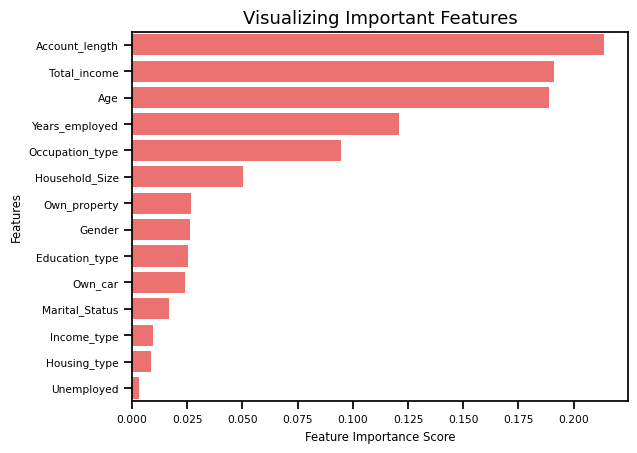

In [ ]:
feature_imp = pd.Series(model_RandomForest.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

As you can see that the Account length has the highest importance and unemployed, Housing_type and Income_type has the lowest importance

In [ ]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred = model_ExtraTrees.predict(X_test)

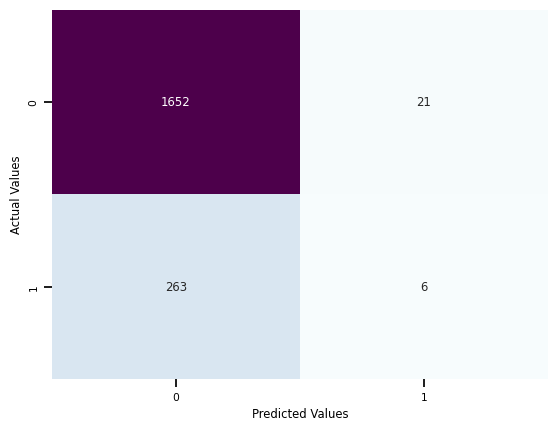

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.22      0.02      0.04       269

    accuracy                           0.85      1942
   macro avg       0.54      0.50      0.48      1942
weighted avg       0.77      0.85      0.80      1942

Accuracy of the model:  0.8537590113285273


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

Is it just Predicting 6 correct values and f1 score of class 1 is not good

In [ ]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
 model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

IndentationError: unexpected indent (<ipython-input-134-57e2566a378b>, line 3)

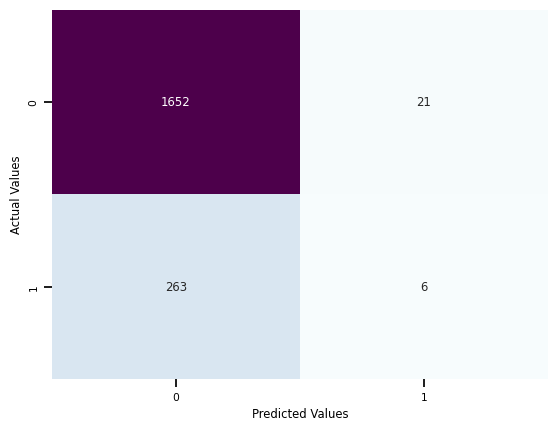

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1673
           1       0.22      0.02      0.04       269

    accuracy                           0.85      1942
   macro avg       0.54      0.50      0.48      1942
weighted avg       0.77      0.85      0.80      1942

Accuracy of the model:  0.8537590113285273


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=10000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

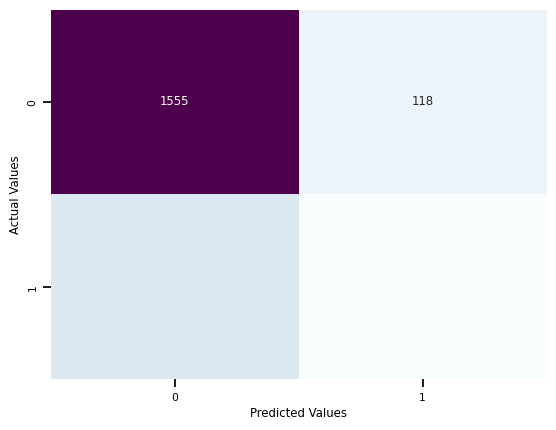

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1673
           1       0.17      0.09      0.12       269

    accuracy                           0.81      1942
   macro avg       0.52      0.51      0.51      1942
weighted avg       0.77      0.81      0.79      1942

Accuracy of the model:  0.8130792996910402


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## SMOTE

In [ ]:
!pip install imblearn

In [ ]:
import imblearn

In [ ]:
#import sklearn.utils._param_validation

In [ ]:
X=new_df.values[:,:-1]
Y=new_df.values[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [ ]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  881
Before OverSampling, counts of label '0':  5915
After OverSampling, the shape of train_X:  (11830, 14)
After OverSampling, the shape of train_y:  (11830,)
After OverSampling, counts of label '1':  5915
After OverSampling, counts of label '0':  5915


In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)

Y_pred=model_RandomForest.predict(X_test)

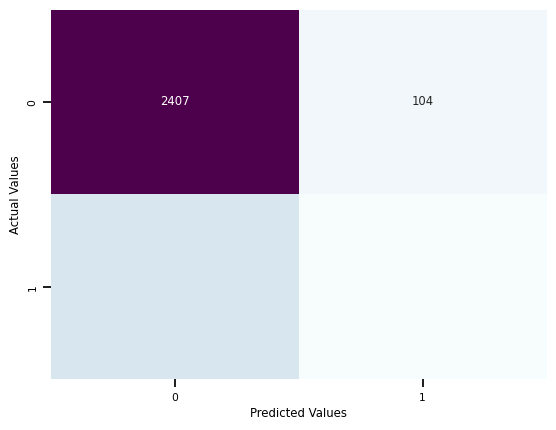

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2511
         1.0       0.11      0.03      0.05       402

    accuracy                           0.83      2913
   macro avg       0.49      0.50      0.48      2913
weighted avg       0.76      0.83      0.79      2913

Accuracy of the model:  0.8307586680398215


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


In [ ]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=151,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train_res,Y_train_res)

Y_pred = model_ExtraTrees.predict(X_test)

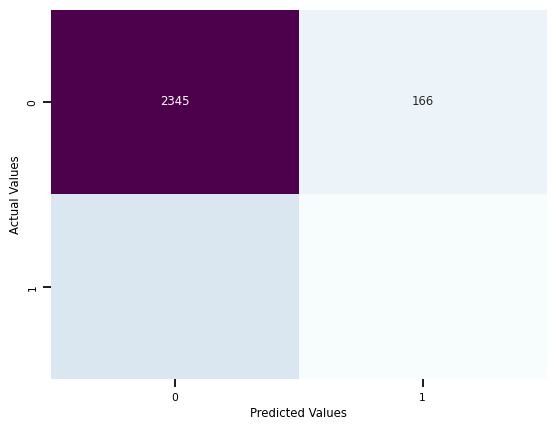

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      2511
         1.0       0.15      0.07      0.10       402

    accuracy                           0.81      2913
   macro avg       0.51      0.50      0.50      2913
weighted avg       0.76      0.81      0.79      2913

Accuracy of the model:  0.8149673875729488


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=150,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train_res,Y_train_res)

Y_pred=model_AdaBoost.predict(X_test)

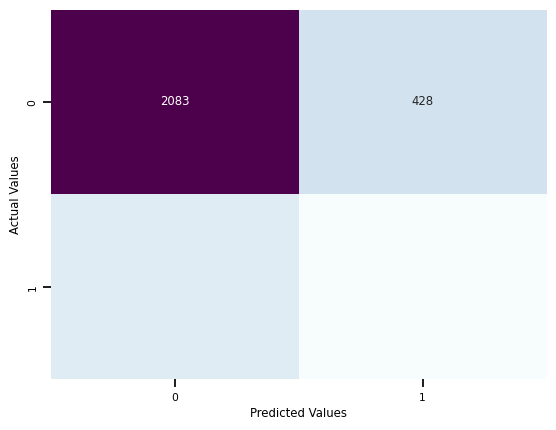

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      2511
         1.0       0.14      0.18      0.16       402

    accuracy                           0.74      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.76      0.74      0.75      2913

Accuracy of the model:  0.739787161002403


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=1000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)

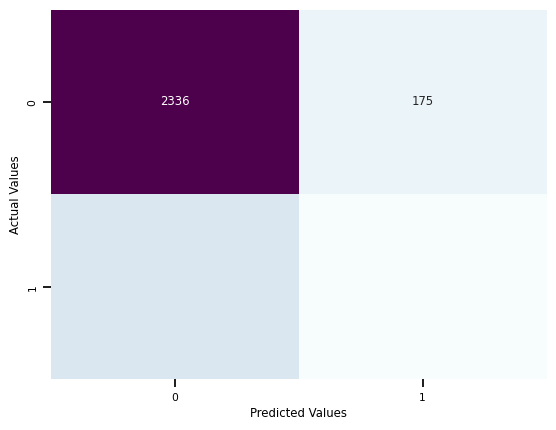

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      2511
         1.0       0.14      0.07      0.09       402

    accuracy                           0.81      2913
   macro avg       0.50      0.50      0.49      2913
weighted avg       0.76      0.81      0.78      2913

Accuracy of the model:  0.811534500514933


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train_res,Y_train_res)

Y_pred=classifier.predict(X_test)

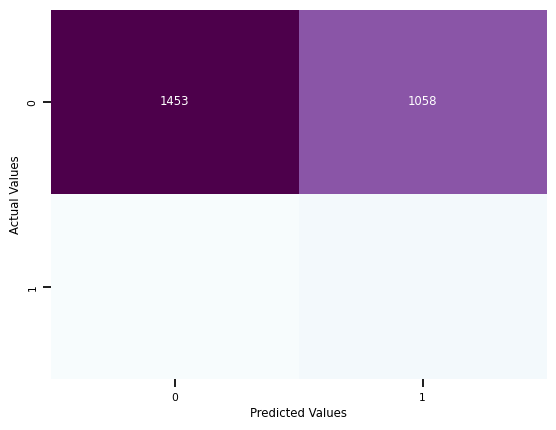

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70      2511
         1.0       0.17      0.53      0.26       402

    accuracy                           0.57      2913
   macro avg       0.53      0.56      0.48      2913
weighted avg       0.79      0.57      0.64      2913

Accuracy of the model:  0.5722622725712324


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_res,Y_train_res)
#predicting the test set results
Y_pred = classifier.predict(X_test)

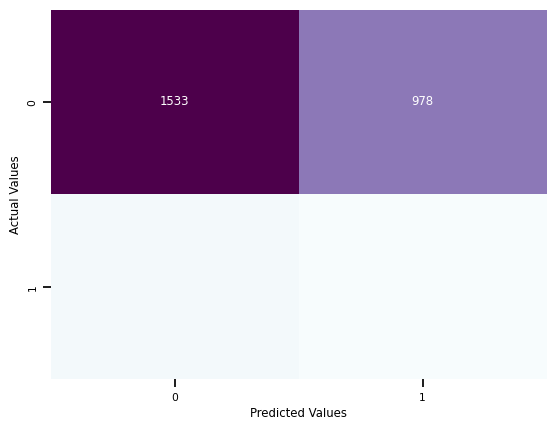

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72      2511
         1.0       0.16      0.46      0.24       402

    accuracy                           0.59      2913
   macro avg       0.52      0.54      0.48      2913
weighted avg       0.78      0.59      0.65      2913

Accuracy of the model:  0.5897699965671129


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=4,
                              metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train_res,Y_train_res)

Y_pred=model_KNN.predict(X_test)

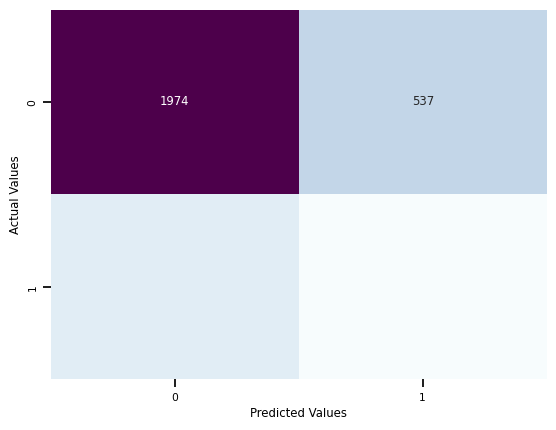

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      2511
         1.0       0.14      0.22      0.17       402

    accuracy                           0.71      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.76      0.71      0.73      2913

Accuracy of the model:  0.7082046000686577


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## Conclusion:
    According to the above predictions, we can observe multiple models are giving multiple different predictions Out of all those models, we can observe that KNN is performing well in terms of predicting my class 1, which is my class of importance where I want the model to be predict precisely in terms of rest of the class.